<a href="https://colab.research.google.com/github/MariumAZ/DeepLab/blob/master/Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was inspired by this article 
https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da  written by **Christian Hubbs**

In [0]:
#libraries 
import numpy as np 
import matplotlib.pyplot as plt 

In [0]:
class Bandit:
  def __init__(self, k, eps, iters):
    self.k=k
    self.iters=iters
    self.eps=eps
    self.n=0 #step count
    self.mean_reward=0
    self.k_reward=np.zeros(k)
    self.reward=np.zeros(iters)
    #Step count for each arm
    self.k_n = np.zeros(k)
    self.lr=0.1 # learning rate 
    #We'll also define a term mu that we can use to adjust the average rewards of each of the arms.
  def distribution(self):
    #initialistaion of random rewards
    dist=[]
    for i in range(self.k):
      dist.append(np.random.normal())
    return dist  
  def strategy(self):
    dist=self.distribution()
    if np.random.rand()<self.eps:
      #explore
      a=np.random.choice(self.k)
      #dist[a]=dist[a]+self.lr*(np.random.normal()-dist[a])
    else:
      #take greedy actin
      a=np.argmax(dist)
    reward=np.random.normal(dist[a],1)  
    #update counts :
    self.n+=1
    self.k_n[a] += 1
    #update total mean
    self.mean_reward=self.mean_reward+ (reward-self.mean_reward) / self.n
    #update mean for a single k bandit:
    #self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
  def run(self):
        for i in range(self.iters):
            self.strategy()
            self.reward[i] = self.mean_reward
             #print(self.reward)
    #return (a,dist[a])
  def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)
  



In [0]:
b=Bandit()
b.distribution()
b.strategy()

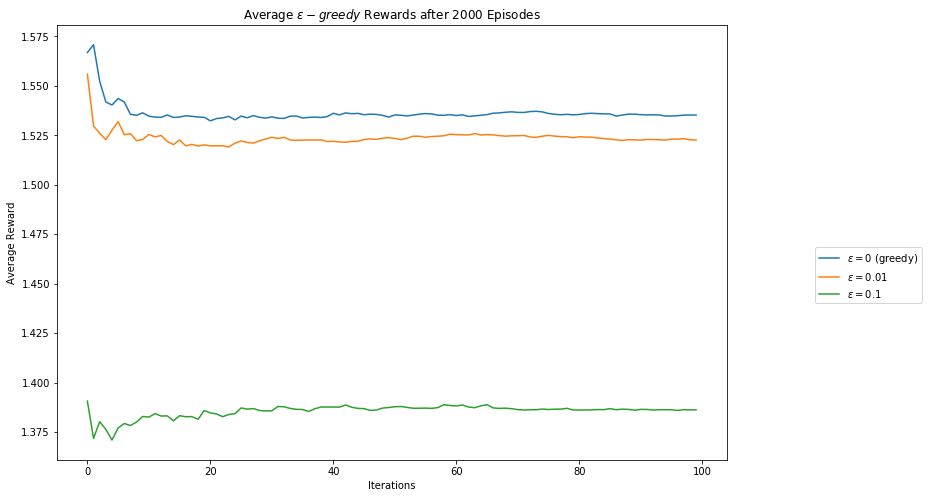

In [48]:
k = 10
iters = 100

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

episodes = 2000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = Bandit(k, 0, iters)
    eps_01 = Bandit(k, 0.01, iters)
    eps_1 = Bandit(k, 0.1, iters)
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

In [46]:
print(eps_0_rewards)


[1.54800548 1.57150753 1.54342771 1.52725177 1.52228899 1.52458315
 1.53665175 1.53570409 1.53743618 1.54404738 1.54406004 1.54298035
 1.53412002 1.53289988 1.53237931 1.5293941  1.52901044 1.52873637
 1.52801861 1.52881598 1.52767146 1.52858015 1.53170823 1.533313
 1.53064157 1.5307091  1.52959578 1.53036096 1.52922871 1.53068248
 1.53135421 1.53244927 1.53319306 1.53462705 1.53437765 1.53478268
 1.53545123 1.53585271 1.53620985 1.5358944  1.53588786 1.53623887
 1.53490236 1.53590439 1.53463973 1.53634138 1.53616832 1.53595898
 1.53679239 1.53683516 1.53785601 1.53785102 1.53680978 1.53604381
 1.53576166 1.53587173 1.53610997 1.53556026 1.53561697 1.53502244
 1.53444534 1.53475929 1.53610202 1.5357613  1.53651308 1.53710819
 1.53715447 1.53685255 1.53742616 1.53825843 1.53854619 1.53747806
 1.53792964 1.53776459 1.53854898 1.53812777 1.53844438 1.53752432
 1.53791535 1.53717639 1.53756008 1.53766855 1.53755338 1.53754518
 1.53734128 1.53811096 1.53783105 1.53814653 1.53868649 1.538827

In [47]:
print(len(eps_0_rewards))

100
